In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error

In [ ]:
!pip install shap
!pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 1.7 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=c1e06d65a3865c98f51ed8a6879b473ee4cbc9778e5800bc40d8d0783020c13e
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import copy
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shap
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import copy


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/My-Courses/Truthworthy_AI/HWs/HW2/Life Expectancy Data.csv')

In [ ]:
continent = []

continents = {
    'EU': 'Europe',
    'AF': 'Africa',
    'AS': 'Asia',
    'NA': 'North America',
    'SA': 'South America',
    'OC': 'Australia'
}

for c in df.Country:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(c)))])
    except:
        continent.append("Asia")
df["Continent"] = continent

<ipython-input-173-34ea4ee4647a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



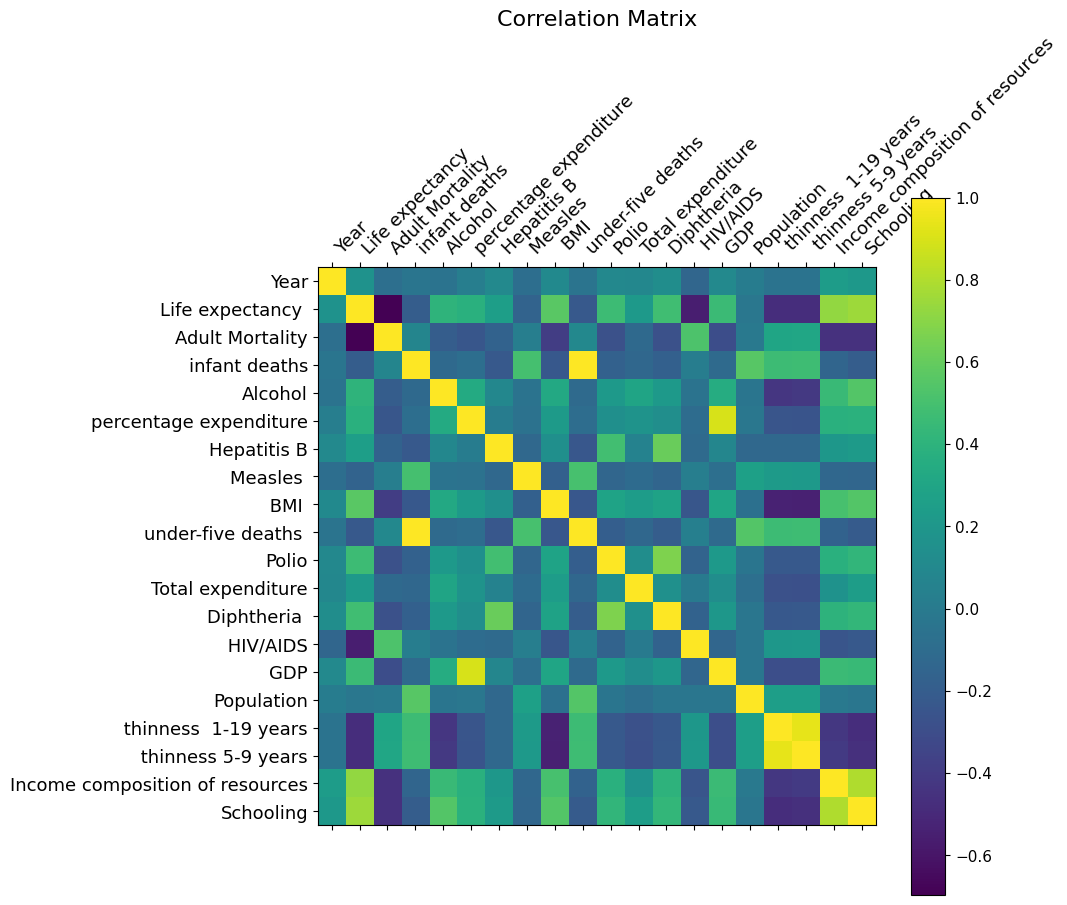

In [ ]:
f = plt.figure(figsize=(9, 9))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13, ha="left", rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=13)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)
plt.title('Correlation Matrix', fontsize=16);

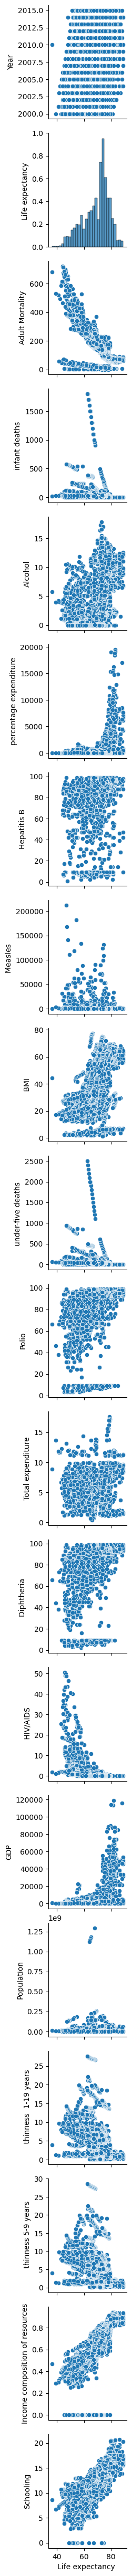

In [ ]:
sns.pairplot(df, x_vars=['Life expectancy '])

In [ ]:
# y=-8/3x+730/3

xs = list(range(35, 100, 5))
ys = [-8*x/3 + 250 for x in xs]
print(ys)

[156.66666666666669, 143.33333333333331, 130.0, 116.66666666666666, 103.33333333333334, 90.0, 76.66666666666666, 63.33333333333334, 50.0, 36.66666666666666, 23.333333333333343, 10.0, -3.333333333333343]


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df['Life expectancy '], y=df['Adult Mortality'],
                    mode='markers',
                    name='markers'))
fig.add_trace(go.Scatter(x=xs, y=ys,
                    mode='lines',
                    name='lines'))

fig.show()

In [ ]:
wrong_mortality_indexes = -8*df['Life expectancy ']/3 + 250 > df['Adult Mortality']
df.loc[wrong_mortality_indexes, 'Adult Mortality '] = df.loc[wrong_mortality_indexes, 'Adult Mortality'] * 10

wrong_mortality_indexes = -8*df['Life expectancy ']/3 + 250 > df['Adult Mortality'] # dealing with the second shift of the decimal point
df.loc[wrong_mortality_indexes, 'Adult Mortality'] = df.loc[wrong_mortality_indexes, 'Adult Mortality'] * 10

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent',
       'Adult Mortality '],
      dtype='object')

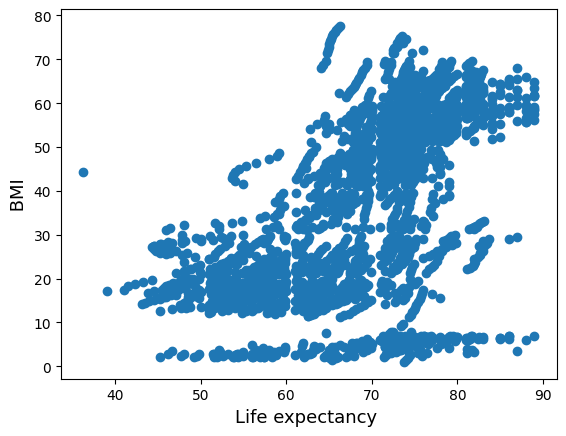

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = df['Life expectancy '], y = df[' BMI '])
plt.ylabel(' BMI ', fontsize=13)
plt.xlabel('Life expectancy ', fontsize=13)
plt.show()

In [ ]:
df_clean = df
df_clean = df_clean.drop(df_clean[df_clean[' BMI ']<10].index)
df_clean = df_clean.drop(df_clean[df_clean[' BMI ']>40].index)

In [ ]:
df_clean['GDP per capita'] = df_clean['GDP']/df_clean['Population']

In [ ]:
df_clean.columns[df_clean.isna().any()].tolist()

['Life expectancy ',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Adult Mortality ',
 'GDP per capita']

In [ ]:
df_clean = df_clean.fillna(df_clean.median())

<ipython-input-183-3d09825f6972>:1: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
df_clean.columns[df_clean.isna().any()].tolist()


[]

In [ ]:
df_clean.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent',
       'Adult Mortality ', 'GDP per capita'],
      dtype='object')

In [ ]:
#removing rows with Contry.count()<2
counts =  df_clean['Country'].value_counts()
df_clean = df_clean[~df_clean['Country'].isin(counts[counts < 2].index)]
df_clean.value_counts('Country')

Country
Afghanistan            16
Chad                   16
Uganda                 16
Timor-Leste            16
Sudan                  16
                       ..
Solomon Islands         3
Antigua and Barbuda     3
Mongolia                3
Honduras                2
Paraguay                2
Length: 87, dtype: int64

In [ ]:
target = df_clean['Life expectancy ']
data = df_clean.drop(columns=['Life expectancy ', ' thinness 5-9 years', 'percentage expenditure', 'under-five deaths '])

In [ ]:
df_clean.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent',
       'Adult Mortality ', 'GDP per capita'],
      dtype='object')

In [ ]:
numeric_cols = [
    "Year",
    "Adult Mortality",
    "infant deaths",
    "Alcohol",
    "Hepatitis B",
    "Measles ",
    " BMI ",
    "Polio",
    "Total expenditure",
    "Diphtheria ",
    " HIV/AIDS",
    "GDP",
    "Population",
    " thinness  1-19 years",
    "Income composition of resources",
    "Schooling",
    "GDP per capita",
]

normalized_numeric_cols = pd.DataFrame(
    RobustScaler().fit_transform(data[numeric_cols]), columns=numeric_cols
)
normalized_numeric_cols.shape

(1125, 17)

In [ ]:
categorical_cols = [
    'Status',
    #'Country',
]
one_hot_cols = pd.get_dummies(data[categorical_cols]).reset_index(drop=True)
one_hot_cols.shape

(1125, 2)

In [ ]:
unchanged_cols = [c for c in data.columns if c not in numeric_cols and c not in categorical_cols]
other_cols = data[unchanged_cols].reset_index(drop=True)

In [ ]:
ready_data = pd.concat([normalized_numeric_cols, one_hot_cols, other_cols], axis=1)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(ready_data), target, test_size=0.1, stratify = ready_data['Country'])

In [ ]:
continents = ['Continent_' + s for s in ready_data['Continent'].unique().tolist()]
countries = ['Country_' + s for s in ready_data['Country'].unique().tolist()]

In [ ]:
model = nn.Sequential(
    nn.Linear(112, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [ ]:
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32).reshape(-1, 1)

In [ ]:
X_train.shape

(1012, 112)

In [ ]:
# train-test split of the dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True)


# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train_tensor[start:start+batch_size]
            y_batch = y_train_tensor[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test_tensor)
    mse = loss_fn(y_pred, y_test_tensor)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
#model.load_state_dict(best_weights)

MSE: 171.41
RMSE: 13.09


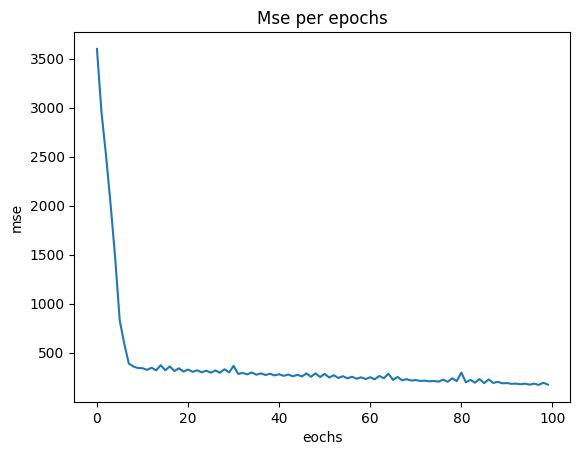

In [ ]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.ylabel("mse")
plt.xlabel("eochs")
plt.title("Mse per epochs")
plt.show()


## Kernel SHAP

  0%|          | 0/113 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



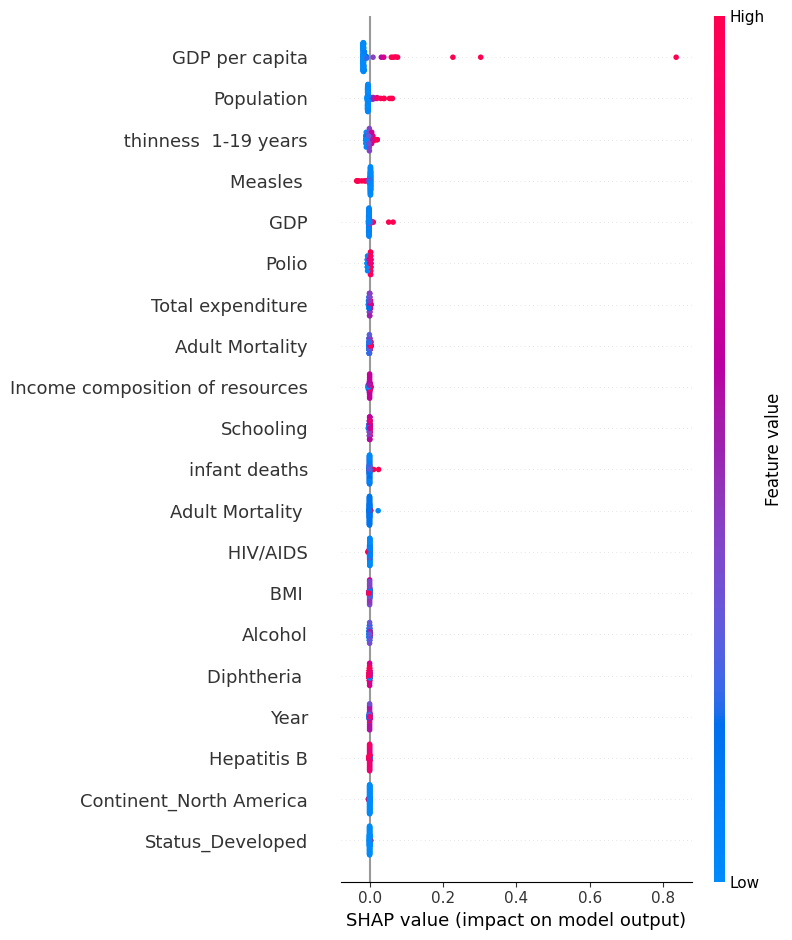

In [ ]:
import torch
from torch.autograd import Variable
import shap
import numpy
import pandas

torch.set_grad_enabled(False)
shap.initjs()

X_train_df = X_train
X_test_df = X_test

f = lambda x: model( Variable( torch.from_numpy(x) ) ).detach().numpy()
data = X_test_df.to_numpy(dtype=np.float32)
explainer = shap.KernelExplainer(f, data)
shap_values = explainer.shap_values(data)

shap.summary_plot(shap_values[0], data, X_test_df.columns)

In [ ]:
(X_test.sum(axis=0))[80:110]

In [ ]:
continents

['Continent_Asia',
 'Continent_Africa',
 'Continent_North America',
 'Continent_South America',
 'Continent_Australia']

In [ ]:
X_test_sample = X_test.reset_index(drop=True)
sample1 = X_test_sample[X_test_sample['Continent_Asia'] == 1].sample(1)
sample2 = X_test_sample[X_test_sample['Continent_Asia'] == 1].sample(1)

In [ ]:
for i in countries:
  if sample1[i].item() == 1:
    print(print(i))
  if sample2[i].item() == 1:
    print(print(i))

Country_Democratic People's Republic of Korea
None
Country_Yemen
None


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value,
                              shap_values[0][sample1.index,:],
                              sample1)

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value,
                              shap_values[0][sample2.index,:],
                              sample2)

## Deep Shape

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning:

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



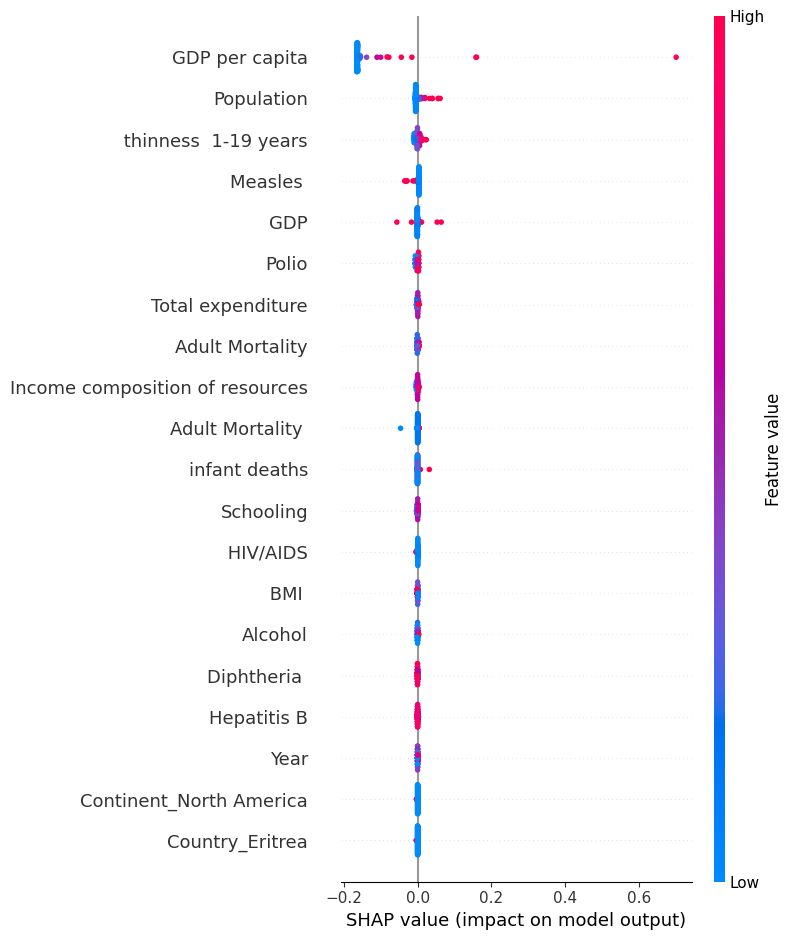

In [ ]:
torch.set_grad_enabled(True)
explainer_deep = shap.DeepExplainer(model, Variable( torch.from_numpy( X_train_df.to_numpy(dtype=np.float32) ) ) )
shap_values = explainer_deep.shap_values( Variable( torch.from_numpy(data) ) )
shap.summary_plot(shap_values, data, X_test_df.columns)

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value,
                              shap_values[sample1.index,:],
                              sample1)

In [ ]:
shap.initjs()

shap.force_plot(explainer.expected_value,
                              shap_values[sample2.index,:],
                              sample2)